### Bibliotecas

In [358]:
import basedosdados as bd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

### Leitura do banco de dados

In [359]:
df = bd.read_table(dataset_id='br_ibge_populacao', 
            table_id='brasil',
            billing_project_id="projeto-do-caue")

Downloading: 100%|███████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 72.79rows/s]


In [360]:
df_copia = df.copy()

### 1ª Etapa: Análise exploratória do banco de dados

In [361]:
df.head()  # formato dos dados

,ano,populacao
0,1991,146815815
1,1992,149236984
2,1993,151571727
3,1994,153725670
4,1995,155822440


In [362]:
df.info()  # quantidades de colunas, linhas e tipo dos dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ano        30 non-null     int64
 1   populacao  30 non-null     int64
dtypes: int64(2)
memory usage: 608.0 bytes


In [363]:
df["populacao"].isna().sum()   # quantidade de lacunas (não há dados disponíveis)

0

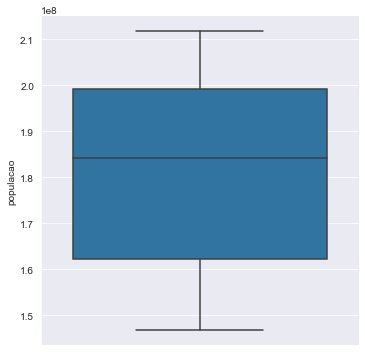

In [364]:
# Verificar a existência de outliers que poderão atrapalhar as estimativas
sns.set_style("darkgrid")

g1 = sns.catplot(data = df,
                 y = "populacao",
                 kind = "box")

plt.title

plt.show()

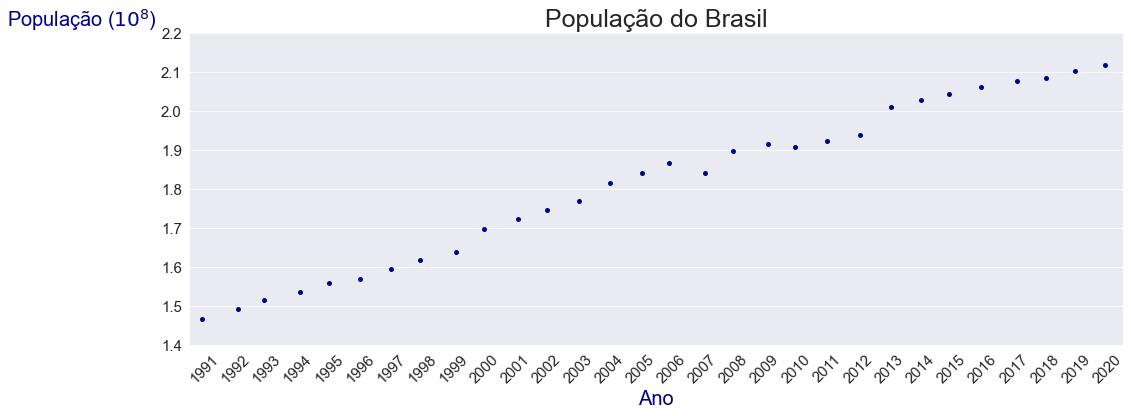

In [436]:
# Verificar comportamento da população ao longo dos anos
sns.set_style("darkgrid")

g2 = sns.catplot(data = df,
                x = "ano",
                y = "populacao",
                color = "darkblue",
                legend = False)

# Configurações do plot
plt.title("População do Brasil",
          size = 25)

plt.xlabel("Ano",
           size = 20,
           color = "darkblue")

plt.ylabel("População ($10^{8}$)",
           size = 20,
           rotation = 0,
           loc = "top",
           color = "darkblue")

g2.fig.set_size_inches(15,5)

g2.set_xticklabels(fontsize = 15,
                   rotation = 45)

g2.set_yticklabels(fontsize = 15)
plt.show()

#### Conclusões: o banco de dados usado não possui erros significativos, tampouco apresenta dados incoerentes ou até mesmo a falta desses. Além disso, ao analisar a população brasileira entre 1991 e 2020, percebe-se que esta apresenta um comportamento linear. Portanto, façamos algumas estimativas com base em diferentes funções

### 2ª Etapa: Encontrar aproximações para a população brasileira

### Aproximação por funções de regressão

In [428]:
%run funcoes_de_apoio.ipynb  # roda as funções de outro notebook de minha autoria

### $y = ax + b$

In [367]:
coefs_reta = ajusta_reta(df["ano"], df["populacao"])
print("a = %.4f" % coefs_reta[0])
print("b = %.4f" % coefs_reta[1])

a = 2327616.9255
b = -4486687991.4655


### $y = be^{ax}$

In [368]:
coefs_exp = ajusta_exp(df["ano"], df["populacao"])
print("a = %.4f" % coefs_exp[0])
print("b = %.4f" % coefs_exp[1])

a = 0.0130
b = 0.0008


### 3ª Etapa: Comparar os valores reais com as aproximações 

In [440]:
# Calcula as aproximações com os coeficientes encontrados
aproxs_reta = calcula_aprox_reta(coefs_reta, df["ano"])
aproxs_exp = calcula_aprox_exp(coefs_exp, df["ano"])

In [370]:
# Cria colunas que contêm os valores das aproximações calculadas
df_copia["$y = ax + b$"] = aproxs_reta
df_copia["$y = be^{ax}$"] = aproxs_exp

In [371]:
df_copia.head()

,ano,populacao,$y = ax + b$,$y = be^{ax}$
0,1991,146815815,1.475973e+08,1.492251e+08
1,1992,149236984,1.499249e+08,1.511786e+08
2,1993,151571727,1.522525e+08,1.531576e+08
3,1994,153725670,1.545802e+08,1.551626e+08
4,1995,155822440,1.569078e+08,1.571938e+08


In [372]:
# Insere todos os valores dentro da coluna "Quantidades", de forma a plotar os gráficos
df_copia_2 = df_copia.melt("ano",
                           var_name = "Quantidades",
                           value_name = "Valores")
df_copia_2.head()

,ano,Quantidades,Valores
0,1991,populacao,146815815.0
1,1992,populacao,149236984.0
2,1993,populacao,151571727.0
3,1994,populacao,153725670.0
4,1995,populacao,155822440.0


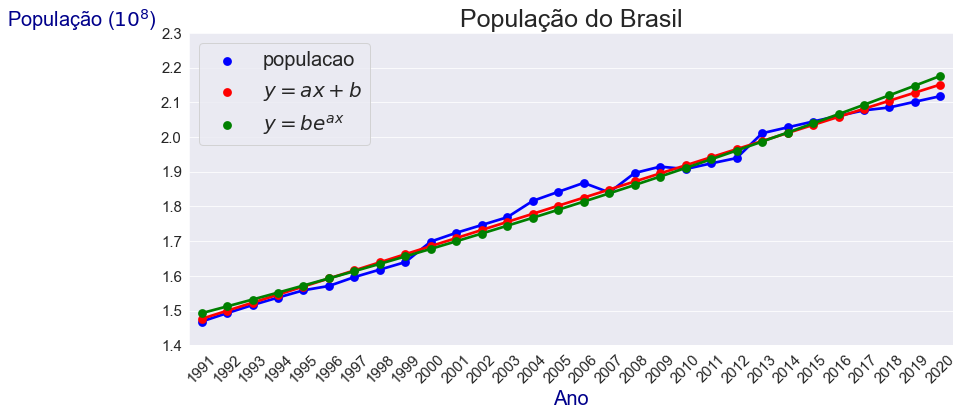

In [439]:
# Verificar comportamento da população ao longo dos anos
sns.set_style("darkgrid")

g3 = sns.catplot(x = "ano",
                 y = "Valores",
                 hue = "Quantidades",
                 data = df_copia_2,
                 kind = "point",
                 palette = ["blue","red","green"])

# Configurações do título do plot
plt.title("População do Brasil",
          size = 25)
# Configurações dos eixos do plot
plt.xlabel("Ano",
           size = 20,
           color = "darkblue")

plt.ylabel("População ($10^{8}$)",
           size = 20,
           rotation = 0,
           loc = "top",
           color = "darkblue")

g3.set_xticklabels(fontsize = 15,
                   rotation = 45)

g3.set_yticklabels(fontsize = 15)
# Configurações da figura do plot
g3.fig.set_size_inches(15,5)
# Configurações da legenda do plot
g3._legend.remove()
plt.legend(fontsize = 20)

plt.show()

### 4ª Etapa: Realizar algumas estimativas

In [399]:
# Cria um vetor com os anos de 2021 até 2050
anos_seguintes = np.arange(2021, 2051, 1)

In [400]:
# Calculas as previsões da população para os anos de 2021 até 2050
estimativas_reta = calcula_aprox_reta(coefs_reta, anos_seguintes)
estimativas_exp = calcula_aprox_exp(coefs_exp, anos_seguintes)

In [401]:
# Converte os dados obtidos anteriormente em um dataframe
data = {"Ano": anos_seguintes, "$y = ax + b$": estimativas_reta, "$y = be^{ax}$": estimativas_exp}
df_estim = pd.DataFrame(data)

In [402]:
df_estim.head()

,Ano,$y = ax + b$,$y = be^{ax}$
0,2021,2.174258e+08,2.204410e+08
1,2022,2.197534e+08,2.233267e+08
2,2023,2.220810e+08,2.262502e+08
3,2024,2.244087e+08,2.292120e+08
4,2025,2.267363e+08,2.322126e+08


In [404]:
# # Insere todos os valores dentro da coluna "Quantidades", de forma a plotar os gráficos
df_estim_2 = df_estim.melt("Ano",
                           var_name = "Quantidades",
                           value_name = "Valores")

In [405]:
df_estim_2.head()

,Ano,Quantidades,Valores
0,2021,$y = ax + b$,2.174258e+08
1,2022,$y = ax + b$,2.197534e+08
2,2023,$y = ax + b$,2.220810e+08
3,2024,$y = ax + b$,2.244087e+08
4,2025,$y = ax + b$,2.267363e+08


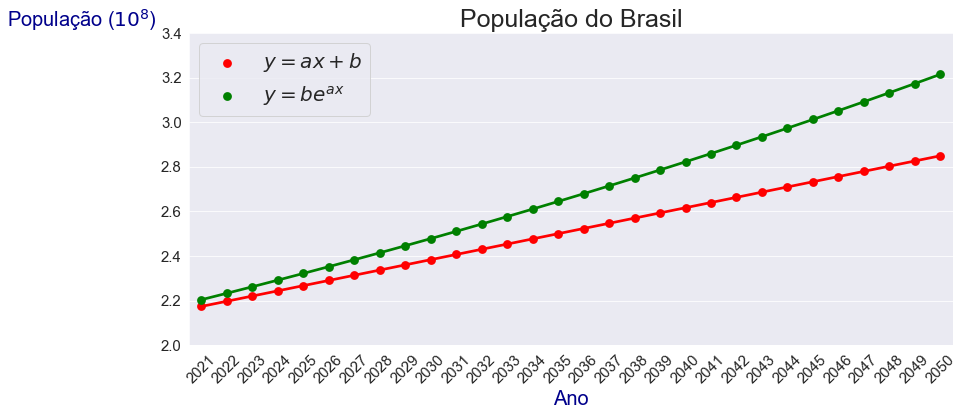

In [407]:
# Verificar comportamento da população ao longo dos anos
sns.set_style("darkgrid")

g4 = sns.catplot(x = "Ano",
                 y = "Valores",
                 hue = "Quantidades",
                 data = df_estim_2,
                 kind = "point",
                 palette = ["red","green"])

# Configurações do título do plot
plt.title("População do Brasil",
          size = 25)
# Configurações dos eixos do plot
plt.xlabel("Ano",
           size = 20,
           color = "darkblue")

plt.ylabel("População ($10^{8}$)",
           size = 20,
           rotation = 0,
           loc = "top",
           color = "darkblue")

g4.set_xticklabels(fontsize = 15,
                   rotation = 45)

g4.set_yticklabels(fontsize = 15)
# Configurações da figura do plot
g4.fig.set_size_inches(15,5)
# Configurações da legenda do plot
g4._legend.remove()
plt.legend(fontsize = 20)

plt.show()

#### Conclusões: as estimativas através das duas curvas são próximas nos anos após 2020. No entanto, a longo prazo, a tendência é que elas se distanciem cada vez mais. Tendo em vista o conhecimento empírico do crescimento de populações de países, eu acredito que a reta seja o melhor modelo para estimar a população nos anos seguintes. 